<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    964 non-null    float64
 1   release_date  964 non-null    object 
 2   title         964 non-null    object 
 3   vote_average  964 non-null    float64
dtypes: float64(2), object(2)
memory usage: 30.3+ KB
None
popularity      0
release_date    0
title           0
vote_average    0
dtype: int64
duplicated values:  2


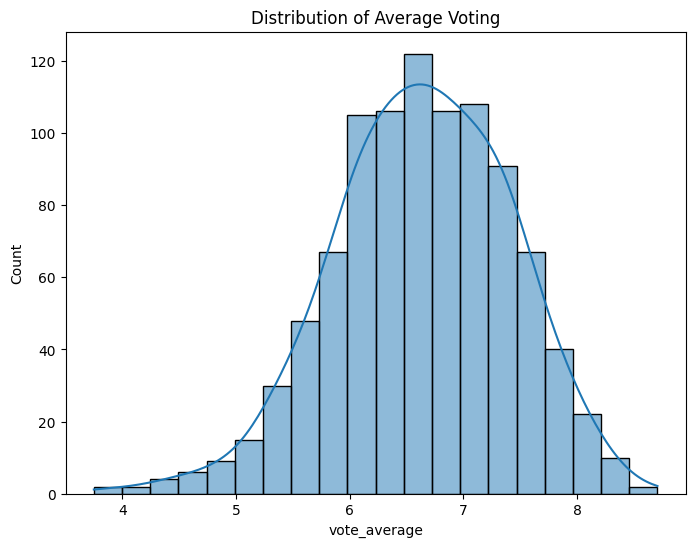

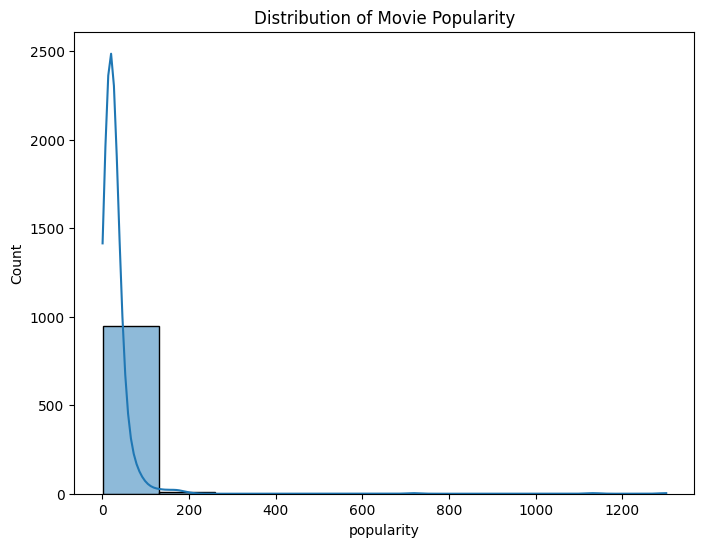

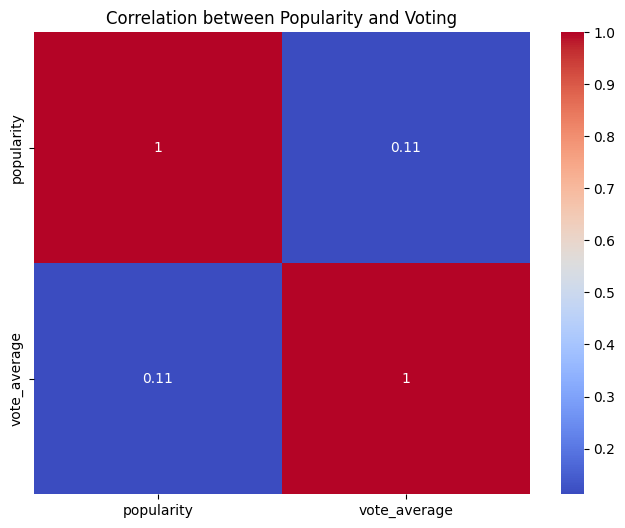

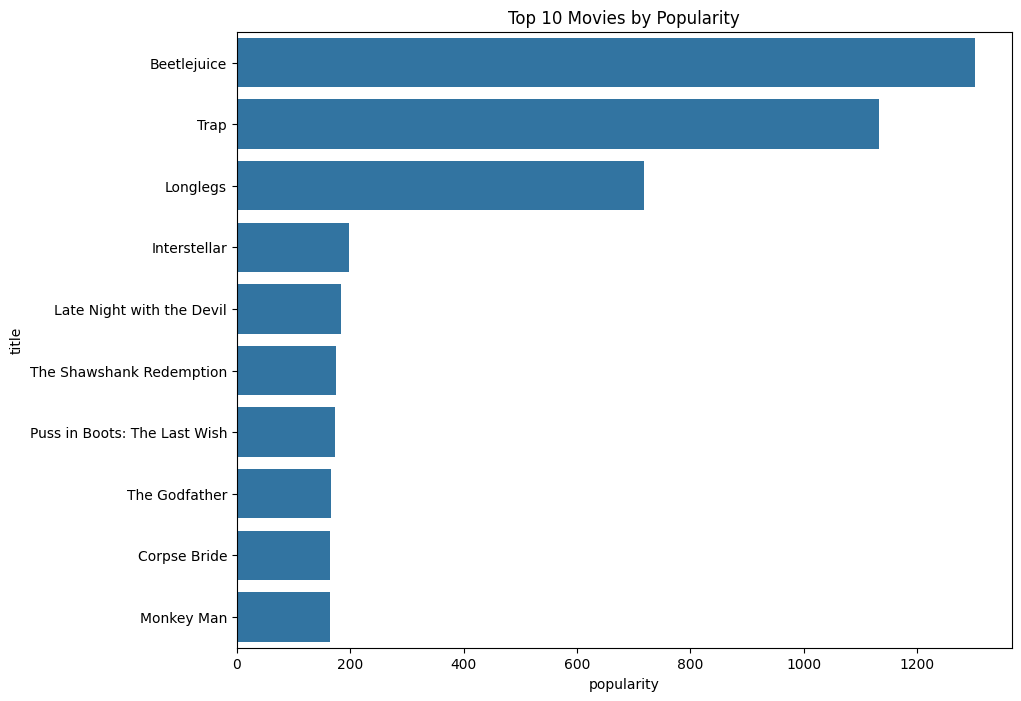

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('movies.csv')

print(df.info())
print(df.isnull().sum())

# checking for some statistics
df.describe()

# checking for dulicated values and drop them

ddf = df.duplicated().sum()
print("duplicated values: ", ddf)
df.drop_duplicates(inplace=True)

# Now we have to convert date in date format
df['release_date'] = pd.to_datetime(df['release_date'])

# plot no -1 histgram
plt.figure(figsize=(8,6))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Average Voting')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(df['popularity'], bins=10, kde=True)
plt.title('Distribution of Movie Popularity')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df[['popularity', 'vote_average']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Popularity and Voting')
plt.show()

# Top ten Movies

top_10_movies = df.nlargest(10, 'popularity')

plt.figure(figsize=(10,8))
sns.barplot(x='popularity', y='title', data=top_10_movies)
plt.title('Top 10 Movies by Popularity')
plt.show()